# Machine Learning Lab Assignment One
### Group Members: Andrew Breslauer, Camilo Villamizar
During this lab, we will be exploring a dataset the analyzes observed factors of almost 18 thousand stars, trying to predict if they will turn into a pulsar star. Pulsars are incredibly relevant to astrophysics as well as trying to determine sources of high energy cosmic rays. Once prediction begin, an high accuracy value is necessary for this algorithm to be useful (probably approx. 93% or higher). 

## What is a pulsar star?
A pulsar star is a highly magnetized white dwarf star that emits a high volume of electro-magnetic radiation. They are one of the possible sources for ultra-high energy cosmic rays. Pulsar stars are important as a source of indirectly confirming the existence of gravitational radiation, and their atomic-clock level accuracy in keeping time with their rotational periods. 

In [1]:
# Load in the pulsar star dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv("pulsar_stars.csv")
df.head()

Pandas: 0.25.1
Numpy: 1.16.4


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [2]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


### What does any of this mean?
Data is neat and all, but knowing that data exists doesn't explain what that data is. The two main observed traits are the integrated profile and the DM-SNR curve, observing the mean, standard deviation, excess kurtosis, and skewness of each. The integrated profile is the shorthand notation for the integrated electromagnetic radiation profile, which is the consistent observation of electromagnetic emissions from a periodically rotating star. The DM-SNR (Dispersion Measure - Signal to Noise Ratio) curve is used to distinguish pulsars from other random radar-like waves flying throughout the universe. 
The mean is what the mean has always been, the average of the observed data. The standard deviation follows this same pattern, being the average of the distance from the mean for each value. Those two are known values. The excess kurtosis, for those not delving into statistics, is the sharpness of the peak of a frequency curve; high kurtosis can sometimes indicate the possibility for rapid change, while low kurtosis indicates a more steady value. Skewness is how far the distribution of the data extends from a standard bell curve. 

#### A small observation
As we can see in the mean of the target_class, only 9.16% of the data is an actualy pulsar, meaning that this is an incredibly unbalanced dataset. Hopefully, despite being such a small subsection of the accumulated data, there is enough data in the 1,639 positive (target_class=1) samples to generate a good visualization.

In [3]:
print(df.dtypes)
print("=============")
print(df.info())

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Stan

## Questions we might want to ask:
- What feature corresponds most to the creation of a pulsar star?
- Are there certains size ranges where becoming a pulsar star is more likely?
- 




             meanIP         stdIP  excessKurtosisIP    skewnessIP  \
count  17898.000000  17898.000000      17898.000000  17898.000000   
mean     111.079968     46.549532          0.477857      1.770279   
std       25.652935      6.843189          1.064040      6.167913   
min        5.812500     24.772042         -1.876011     -1.791886   
25%      100.929688     42.376018          0.027098     -0.188572   
50%      115.078125     46.947479          0.223240      0.198710   
75%      127.085938     51.023202          0.473325      0.927783   
max      192.617188     98.778911          8.069522     68.101622   

          meanDMSNR      stdDMSNR  excessKurtosisDMSNR  skewnessDMSNR  \
count  17898.000000  17898.000000         17898.000000   17898.000000   
mean      12.614400     26.326515             8.303556     104.857709   
std       29.472897     19.470572             4.506092     106.514540   
min        0.213211      7.370432            -3.139270      -1.976976   
25%        1.

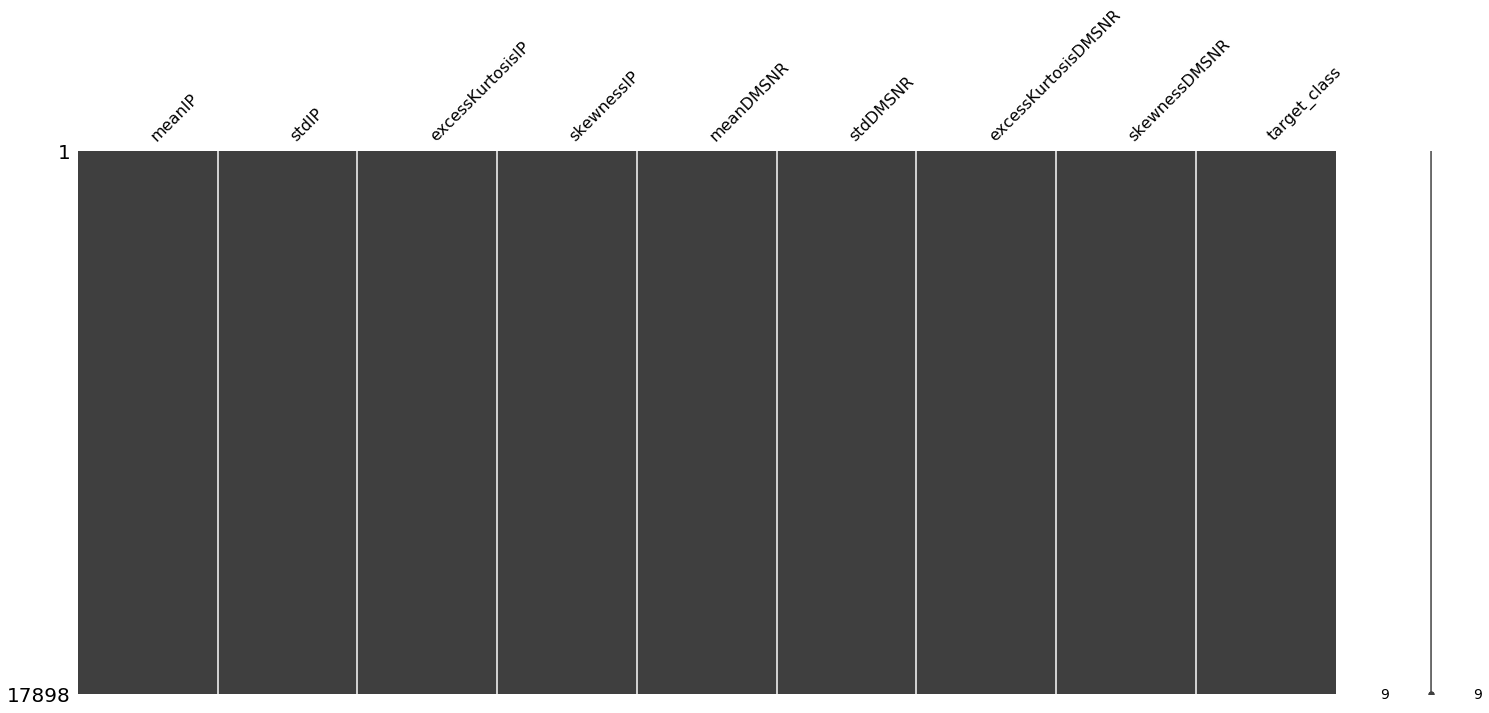

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# Renaming columns so they don't have spaces
df.columns=['meanIP', 'stdIP', 'excessKurtosisIP', 'skewnessIP', 'meanDMSNR', 'stdDMSNR', 'excessKurtosisDMSNR', 'skewnessDMSNR', 'target_class']

import missingno as mn
print(df.describe())
mn.matrix(df.sort_values(by=["meanIP", "meanDMSNR", "stdIP", "stdDMSNR"]))

### Yay! No missing values! That makes this somewhat easier.
However, part of this assignment is how to handle missing data, which is something that we unfortunately can't handle here. If there was missing data, the most likely solution for this particular dataset would be to purge rather than impute, because there is some data that looks very similar with a different result, so trying to impute might introduce an unpredicted bias into the dataset. 

### Histograms and Kernel Density
Historgrams and kernel density charts are usually a good place to start when trying to visualize data because it can help to visualize the spread of the data. For example, as seen below, the mean of the Integrated Profile is distributed with high density around the 110-125, with the remaining data tending to be around 25-75 more so than 125+.

Seaborn: 0.9.0


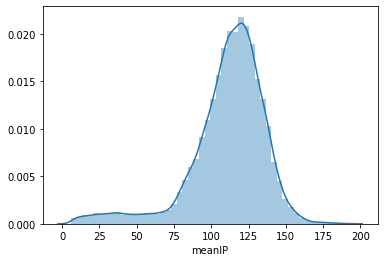

In [5]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('Seaborn:', sns.__version__)

sns.distplot(df.meanIP)


### Exploring a bit more in depth
As mentioned above, histograms and kernel density charts can be a good way to initially explore data, but what value does knowing the spread of some values provide to the overall dataset? Let's try spreading out the data, differing between pulsars and non-pulsars.

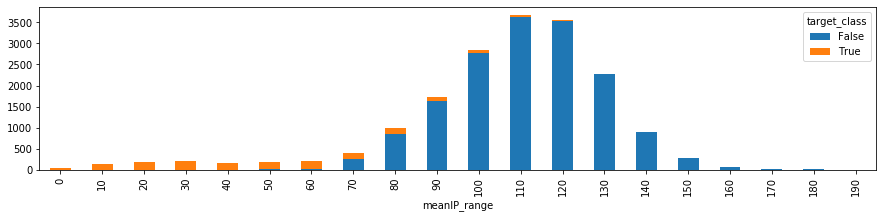

In [8]:
plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,1,1)
# Group meanIP by sets of 5 so that the graph isn't massive
df['meanIP_range'] = pd.cut(df['meanIP'],[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,1e6],
                                 labels=['0','10','20','30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190'])

pd.crosstab([df['meanIP_range']], # categories to cross tabulate
            df.target_class.astype(bool)).plot(kind='bar', stacked=True, ax=ax1) 

plt.show()

### Well there's some interesting data!
As we can see from just that one chart, a large majority of the pulsar stars are in the lower range of the mean IP, while most of the negatives are in the higher range. Let's look at a correlation chart to see if there's any other observations that could provide a greater difference. 

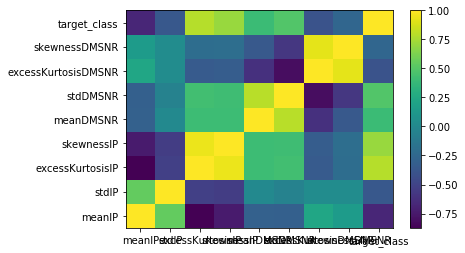

In [9]:
vars_to_use = ['meanIP', 'stdIP', 'excessKurtosisIP', 'skewnessIP', 'meanDMSNR', 'stdDMSNR', 'excessKurtosisDMSNR', 'skewnessDMSNR', 'target_class']
plt.pcolor(df[vars_to_use].corr())

plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

Some other observations that would seem important but make sense when thinking about the data would be the high correlation between specifically the excessKurtosisIP and the skewnessIP; however, when examing what each value means, a higher peak (excess Kurtosis) in the spread of values would mean a higher difference from the standard bell curve (skewness).<br><br>
While an unfortunately messy set of x-axis labels, we can determine that the most correlated factors for target_class are excessKurtosisIP (Excess Kurtosis of the Integrated Profile) with a postive correlation, and meanIP is the most anti-correlated. So the above chart is going to be one of the most harshly defining differentiation factors for the target_class, and creating another would be repetetive. However, let's re-display that data in some different formats to further demonstrate the difference. 

Text(0.5, 1.0, 'Violin Plot')

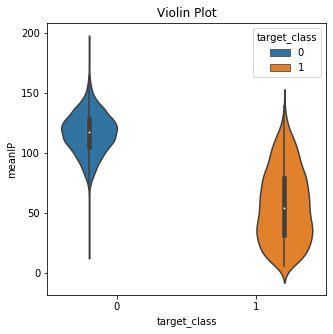

In [10]:
plt.subplots(figsize=(5,5))
plt.subplot(1,1,1)
sns.violinplot(x="target_class", y="meanIP", hue="target_class", data=df)
plt.title("Violin Plot")

Here we can see that the highest distribution of non-pulsars (target_class=0) is somewhere in the 115-125 range, while the highest distribution of pulsars (target_class=1) is almost evenly spread between 25 and 75.